# 1. 데이터 가져오기

## 1-1 데이터 다운로드

데이터를 직접 다운받고 압축을 해제할 수도 있지만,

이를 데이터를 다운로드하는 과정을 간단한 함수로 만든다면 데이터가 변경된다 하더라도 이에 구애받지 않고 최근 데이터를 다운받을 수 있다. 또한 여러 기기에 데이터셋을 설치해야 할 때도 이렇게 자동화를 해놓으면 더욱 편리하다.

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [2]:
# 작업 공간에 datasets/housing 디렉터리를 만들고 housing.tgz 파일을 내려받고
# 같은 디렉터리에 압축을 풀어 housing.csv 파일을 만든다.

fetch_housing_data() 

In [3]:
# 데이터를 읽어들이는 작업 역시 간단하게 함수로 짜서 데이터를 불러올 수 있다.

import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## 1-2 데이터 구조 훑어보기

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


total_bedrooms 컬럼만 Null 값을 갖는다

ocean_proximity 컬럼만 빼고 모두 float이다. 이 컬럼은 아마 string일 것이다. head()를 봤을 때 value가 반복되는 것을 보니 categorical이다.

In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

해당 컬럼의 카테고리가 몇 종류나 되는지 확인 / 각 카테고리 별 얼마나 많은 구역이 있는지 확인

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


describe() 메소드는 숫자형 특성의 요약(통계) 정보를 보여준다.

스스로 Null값은 제거하고 통계치를 보여준다. (total_bedrooms 컬럼을 보면 확인할 수 있다)

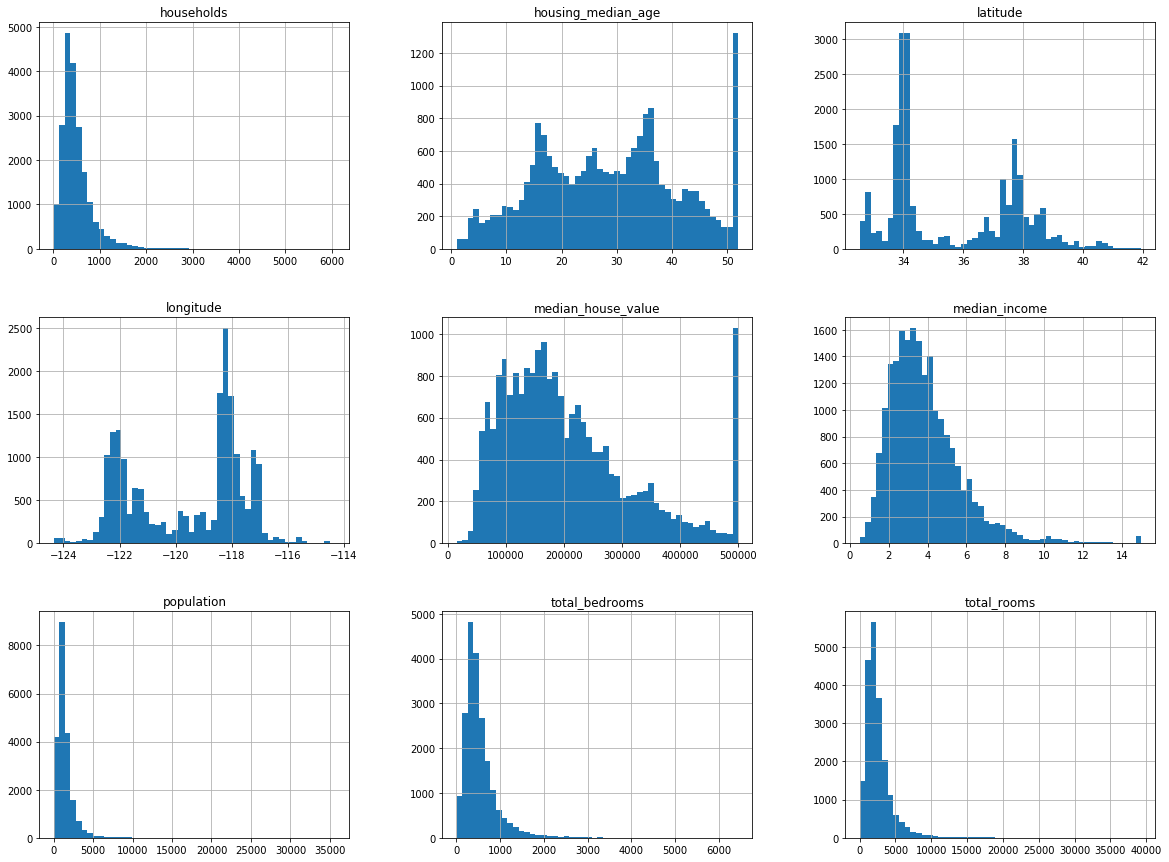

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20,15))
plt.show()

1. median_income 특성의 값이 US 달러가 아니다. 스케일을 조정하고 0.5 ~ 15로 값이 이미 전처리 되어 있다.

2. housing_median_age와 median_housing_value 특성의 값도 최댓값이 한정되어 있다. age나 value는 특성상 매우 오래된, 또는 매우 비싼 값이 나오기 마련이고 그렇다면 히스토그램의 분포가 오른쪽으로 길게 뻗은 left-skewed distribution을 띄어야 한다. 하지만 plot이 50과 500,000에서 급격히 뛰는 것으로 보아 "50 이상" / "500,000 이상"으로 최댓값을 한정했을 것이다.

3. 각 특성의 스케일이 다르다.

4. left-skewed distribution인 특성이 많다.

## 1-3 테스트셋 만들기

In [9]:
# 일관된 출력을 위해 유사난수 초기화
import numpy as np
np.random.seed(42)

In [10]:
# 예시를 위해서 만든 것입니다. 사이킷런에는 train_test_split() 함수가 있습니다.
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set, test_set = split_train_test(housing, 0.2)

위의 방법은 데이터셋이 업데이트 되는 경우에 사용할 수 없다.

일반적으로 train과 test 셋을 구분하는 것은 데이터의 고유한 식별자(id)를 사용하는 것이다.

각 샘플마다 id의 해시값을 계산해서 (이 경우는 해시의 마지막 바이트가 51 이하는 test 셋으로 분류한다. 왜냐하면 256 바이트의 약 20%이기 때문) train과 test 셋으로 분류한다. 이렇게 할 경우 여러 번 반복 실행되면서 데이터셋이 갱신되더라도 test 셋이 동일하게 유지된다. 새로운 test셋은 새 샘플의 20%만을 갖게 되지만 여전이 이전의 train셋에 있던 샘플은 포함되지 않는 것이다.

하지만 위의 방법은 id를 사용하여 분류한 것이 아니라 단순히 전체 데이터셋의 양과 비율, 그리고 radom seed만으로 분류한 것이기 때문에 데이터셋이 업데이트 될 경우 원래 train셋에 포함됐던 샘플이 test셋에 포함되는 경우가 발생할 위험이 있다.

아래는 id를 사용해서 train과 test를 분류하는 함수이다.

In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

하지만 이 데이터셋의 경우는 id 컬럼이 따로 없기 때문에 행의 idnex를 id로 대신 사용한다

In [14]:
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임이 반환됩니다.
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

id를 사용해서 train과 test를 분류할 때 중요한 전제는

새 데이터는 데이터셋의 끝에 추가되며 어떤 행도 삭제되지 않아야 한다는 점이다.

만일 이 전제가 지켜지지 않는다면 고유 식별자로 사용해도 무방할 안전한 특성을 사용해야 한다.

이 경우 주택에 관한 데이터이므로 구역의 위도와 경도는 몇백 년 후에도 안정적이라고 보장할 수 있으므로 두 값을 사용하여 id 컬럼을 만들 수도 있다.

In [15]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [16]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


지금까지 우리가 직접 데이터셋을 여러 서브셋으로 나누는 작업을 해보았지만 사실 사이킷런에는 다양한 메서드를 제공한다.

그 중 train_test_split() 메서드가 가장 간단한데, 
1. random_state을 우리가 직접 지정해줄 수 있고
2. 행의 개수가 같은 여러 데이터셋을 인자로 넘겨서 같은 인덱스를 기반으로 나눌 수도 있다. (데이터프레임이 레이블에 따라 여러 개로 나뉘어 있을 때 유용함)

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [18]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


여기까지가 순수한 무작위 샘플링 방식이다.

하지만 무작위 샘플링도 샘플링 편향이 생길 수 있다.

예를 들어, 전체 인구를 대표할 수 있는 1000명을 무작위 샘플링을 한다고 가정해보자. 이때 모집단의 남녀 비율이 60:40이라고 한다면 샘플도 역시 이 비율을 유지해야 한다. 그렇지 않으면 샘플링 편향이 생기게 된다.

이와 같은 샘플링을 계층적 샘플링 (stratified sampling)이라고 한다.

이 데이터셋의 경우 "중간 소득 (median_income)"이 "중간 주택 가격 (median_house_value)"를 예측하는 데 매우 중요하다고 가정을 세우자.

그렇다면 train과 test를 분류할 때도 이 "중간 소득"의 여러 소득 카테고리가 잘 대표되어야 한다.

하지만 "중간 소득"은 연속적인 숫자형 특성이므로 소득에 대한 카테고리 특성을 새로이 만들어야 하기 때문에 히스토그램을 통해 더 자세히 살펴보자.

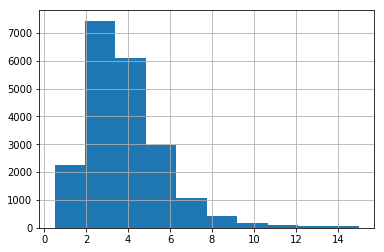

In [19]:
housing["median_income"].hist()

"중간 소득"은 대부분 \$20,000 ~ \$50,000 사이에 모여 있지만 일부는 \$60,000을 넘기도 한다. 

계층별로 데이터셋에 충분한 샘플 수가 있어야 한다. 

따라서 중간 소득을 1.5로 나누고 (소득의 카테고리 수가 너무 많아지지 않도록 제한하기 위해),

ceilling을 해서 소득 카테고리 특성을 만들고 (이산적인 카테고리를 만들기 위해),

5보다 큰 카테고리는 5로 합친다.

In [20]:
# 소득 카테고리 개수를 제한하기 위해 1.5로 나눕니다.
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# 5 이상은 5로 레이블합니다.
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [21]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

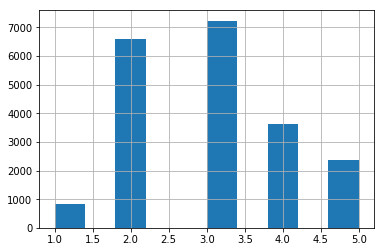

In [22]:
housing["income_cat"].hist()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [25]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

실제로 확인해보니 계층적 샘플링을 했을 경우 중간 소득의 비율에 맞게 train과 test셋이 분할됐음을 확인할 수 있었다.

그렇다면 랜덤 샘플링을 했을 경우와 계층적 샘플링을 했을 경우, 중간 소득 계층의 비율이 어떠한 차이가 나는지 확인해보자

In [26]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [27]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [28]:
# 랜덤 샘플링을 할 경우 "income_cat"이라는 새로운 컬럼을 생성했지만 앞으로 분석에서 쓸모가 없으니 다시 삭제해서 데이터를 원래 상태로 복원하자

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 2. 데이터 이해를 위한 탐색과 시각화

## 2-1 지리적 데이터 시각화

In [29]:
# 원래 훈련 세트를 손상시키지 않기 위해서 복사본을 만들어 사용하자

housing = strat_train_set.copy()

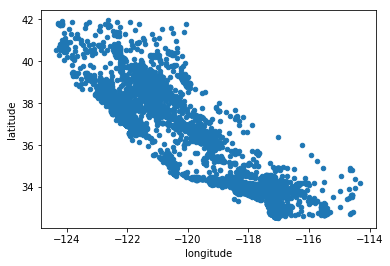

In [30]:
# 지리 정보 (위도와 경도)를 활용하여 모든 구역을 산점도로 시각화해보자

housing.plot(kind = 'scatter', x='longitude', y='latitude')

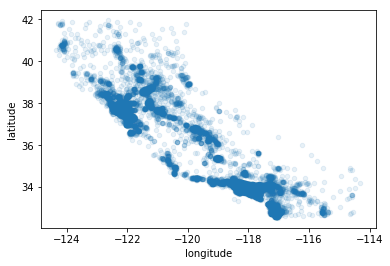

In [31]:
# 위의 plot은 특별한 인사이트를 도출해내기 힘드니 aplha 옵션을 통해 밀집도를 자세히 알아보자

housing.plot(kind = 'scatter', x='longitude', y='latitude', alpha=0.1)

각 지역별로 특정 지역의 데이터가 더 밀집되어 있는지 여부를 눈으로 확인해볼 수 있었다.

이번에는 주택 가격 정보를 추가하여 시각화 해보도록 하자.

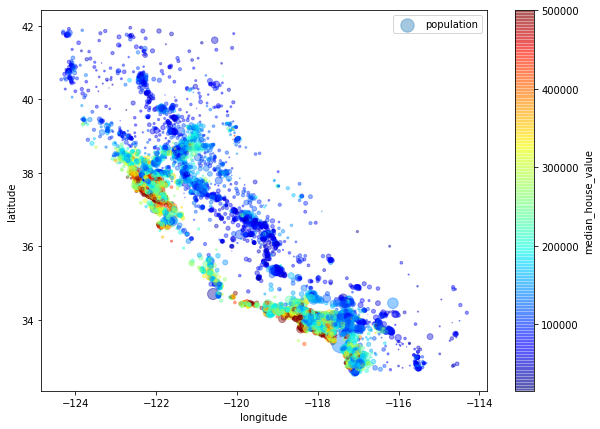

In [32]:
# 원의 반지름은 구역의 인구를 나타낸다 (매개변수 s)
# 색깔은 가격을 나타낸다 (매개변수 c)

housing.plot(kind = 'scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100,
            label='population',
            figsize=(10,7),
            c='median_house_value',
            cmap=plt.get_cmap('jet'),
            colorbar=True,
            sharex=False)
plt.legend()

주택 가격은 지역 (예를 들어 바다와 밀접한 곳 등)과 인구 밀도에 관련이 크다는 것을 확인할 수 있었다.

아마 이러한 사실은 clustering 작업을 할 경우 주요 cluster를 찾고 중심으로부터의 거리를 재는 특성을 추가할 때 활용이 될 수 있을 것이다.

하지만 주의할 점은 북부 캘리포니아 지역의 해안가는 주택 가격이 그리 높지 않기 때문에 (색깔이 파란색이다) 단순히 위의 규칙을 적용하기에는 무리가 있을 것이다.

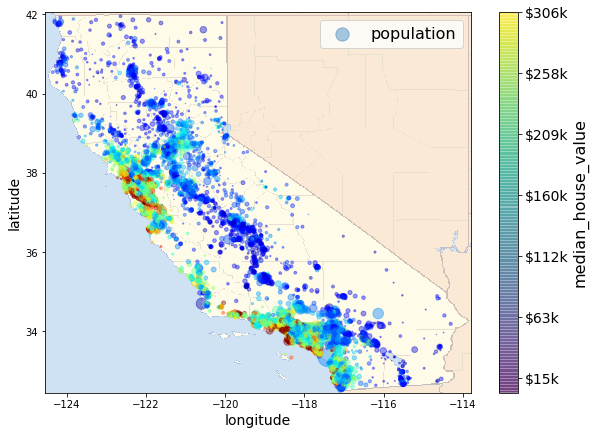

In [33]:
# 실제 지도 위에 위의 plot을 입힌 시각화 자료이다

import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('median_house_value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

## 2-2 상관관계 조사

In [34]:
# 각 특성끼리의 상관계수가 어떠한지 matrix 형태로 살펴보자

corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [35]:
# 중간 주택 가격과 다른 특성들 사이의 상관관계가 어떠한지 따로 떼어내서 다시 살펴보자

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

숫자형 특성 간의 상관관계를 파악할 때는 산점도를 통해서도 확인할 수 있다.

다만 이 데이터셋의 경우 숫자형 컬럼이 11개나 되므로 중간 주택 가격과 상관관계가 높아 보이는 특성 몇 개만 살펴보도록 하자

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C6ECAE5EB8>,
      dtype=object)

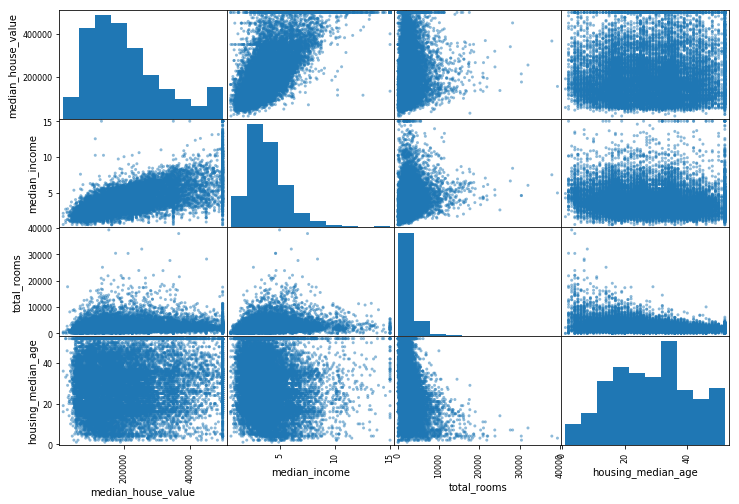

In [36]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

중간 주택 가격을 예측하는 데 가장 유용해 보이는 특성은 "중간 소득 (median_income)" 이므로 이를 따로 떼어내서 다시 산점도를 확대해서 그려보자

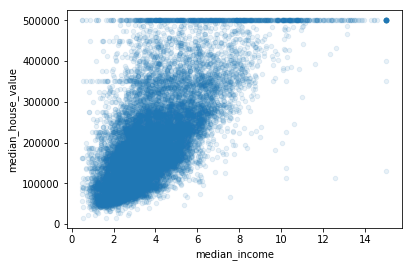

In [37]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

1. 상관관계가 강하다.
2. 가격 제한 값인 \$50,000에서 수평선이 잘 확인된다.
3. 수평선은 \$45000 근처와 \$35,000와 \$28,000에서도 어느 정도 확인된다.
    - 알고리즘이 데이터에서 이런 이상한 형태를 학습하지 않도록 해당 구역을 제거하는 것이 좋다.

## 2-3 특성 조합으로 실험

지금까지 주어진 데이터셋에 머신러닝 알고리즘을 적용하기 전에 정제해야 할 이상한 데이터를 확인했고 특성 간의 상관관계를 발견했다. 어떤 특성은 꼬리가 두꺼운 분포라 log scale을 취해야 할 수도 있고 프로젝트마다 상황에 맞는 추가적인 변환 작업이 요구될 것이다.

이 절에서는 알고리즘을 적용하기 전에 데이터셋에 추가적으로 새로운 특성을 조합해서 만들어내는 작업을 할 것이다. 새롭게 만들어낼 특성은 알고리즘에 조금 더 도움이 될만 한 특성이어야 할 것이다.

In [38]:
# 단순히 방의 개수 보다는 가구당 방 개수가 더 유의미할 것이고,
# 단순히 침대 개수 보다는 방 개수당 침대 개수가 더 유의미할 것이다.

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [39]:
# 새롭게 만든 컬럼들을 포함하여 중간 주택 가격과의 상관관계를 확인해보자

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

실제로 새롭게 만든 컬럼들이 기존의 컬럼 보다는 상관계수가 조금 더 큰 것을 확인할 수 있었다.

하지만 이 역시 완벽한 것은 아니다. 어디까지나 단순한 상관관계에 불과하다.

앞으로 모델을 설계하고 성능을 평가해본 뒤 다시 이 단계로 돌아와서 수정 과정을 거침으로써 새로운 통찰을 얻어 나가는 과정을 반복해야 한다.

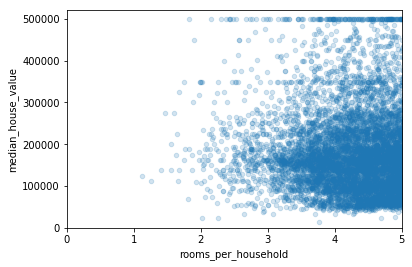

In [40]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [41]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 3 머신러닝 알고리즘을 위한 데이터 준비

머신러닝 알고리즘을 위해 데이터를 준비할 때, 수동으로 하는 대신 함수를 만들어 자동화한다.
1. 새로운 데이터셋에도 쉽게 적용하기 위해
2. 향후 프로젝트에 사용할 수 있는 변환 라이브러리를 점진적으로 구축하기 위해
3. 실제 시스템에서 알고리즘에 새 데이터를 주입하기 전에 변환시키는 데 이 함수를 사용할 수 있음
4. 여러 가지 데이터 변환을 쉽게 시도해볼 수 있고, 어떤 조합이 가장 좋은지 확인하기 편리함

In [42]:
# 원래 훈련 세트로 복원하고,
# 예측 변수와 타깃 값에 같은 변형을 적용하지 않기 위해 예측 변수와 레이블을 분리한다.

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy

In [43]:
housing_labels = strat_train_set['median_house_value']

In [44]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
19480    127900.0
8879     500001.0
13685    140200.0
4937      95000.0
4861     500001.0
16365     92100.0
19684     61500.0
19234    313000.0
13956     89000.0
2390     123900.0
11176    197400.0
15614    500001.0
2953      63300.0
13209    107000.0
6569     184200.0
5825     280900.0
18086    500001.0
16718    171300.0
13600    116600.0
13989     60800.0
15168    121100.0
6747     270700.0
7398     109900.0
5562     159600.0
16121    500001.0
           ...   
12380    122500.0
5618     350000.0
10060    172800.0
18067    500001.0
4471     146600.0
19786     81300.0
9969     247600.0
14621    164100.0
579      254900.0
11682    185700.0
245      126800.0
12130    114200.0
16441    101800.0
11016    265600.0
19934     88900.0
1364     225000.0
1236     123500.0
5364     500001.0
11703    321600.0
10356    266000.0
15270    346700.0
3754     190200.0
12166    148800.0
6003     214800.0
7364     1

## 3-1 데이터 정제

In [45]:
# total_bedrooms 컬럼의 Null 값 처리에 관하여

## 옵션1 Null 값이 있는 행만 drop
# housing.dropna(subset=['total_bedrooms'])

## 옵션2 Null 값이 존재하는 컬럼 자체를 drop
# housing.drop('total_bedrooms', axis=1)

## 옵션3 Null 값을 median 값으로 대체
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)

In [46]:
# 사이킷런에서의 내장 메소드 사용으로 손쉽게 fillna 가능
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # 채워넣을 값은 median으로 설정

housing_num = housing.drop('ocean_proximity', axis=1)  #median 값은 수치형에서만 계산 가능하기 때문에 범주형 변수는 우선 drop
imputer.fit(housing_num) # fit() 메서드를 통해 imputer 객체에 훈련 데이터셋를 적용함 -> 각 수치형 변수들의 median 값이 계산됨

imputer.statistics_ #imputer는 각 컬럼의 median을 계산해서 그 결과를 객체의 statistics_ 속성에 저장함

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [47]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

median 값 계산 잘 돼서 잘 저장된거 확인 가능함

만약 "No module named 'sklearn.impute' 에러 메시지가 뜬다면 현재 인스톨된 sklearn 버젼을 확인한 후 0.20.1로 맞춰준다.

In [48]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.3.
The scikit-learn version is 0.20.2.


!pip conda update conda

!pip conda install scikit-learn=0.20.1

print('The scikit-learn version is {}.'.format(sklearn.__version__))

주피터에서 하려는데 너무 느려서 그냥 terminal에서 바로 했음

In [49]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.2.


In [50]:
# 학습된 imputer 객체의 transform() 메서드를 사용해서 train set에서 누락된 값을 학습된 median 값으로 대체할 수 있음
    
X = imputer.transform(housing_num)

In [51]:
# 위의 결과는 (X는) null 값이 다 median으로 대체된 넘파이 배열이다.
# 따라서 이를 다시 pandas DataFrame 형태로 되돌려야 한다.

housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = list(housing.index.values))

In [52]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [53]:
housing_tr.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

<img src='p101.jpg' width="800">

<img src='p102.jpg' width="800">

## 3-2 텍스트와 범주형 특성 다루기

In [54]:
# 앞서서 ocean_proximity 컬럼은 범주형 변수이기 때문에 따로 뺴놓았었다

housing['ocean_proximity'].unique()

array(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [55]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

대부분의 머신러닝 알고리즘은 숫자형 데이터를 다루므로 이 카테고리를 숫자로 바꾸도록 하자.

각 카테고리를 다른 정수값으로 매핑해주는 pandas의 factorize() 메서드를 사용하자.

In [56]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [57]:
housing_cat_encoded

array([0, 0, 1, ..., 2, 0, 3], dtype=int64)

In [58]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

하지만 이와 같은 표현 방식의 문제점은

알고리즘이 가까이 있는 두 값이 (예를 들면 0과 1) 떨어져 있는 두 값보다 (예를 들면 0과 4) 더 비슷하다고 생각한다는 점이다.

이런 문제를 해결하기 위해 보통 카테고리별로 이진 특성을 만들어 해결한다. (더미화) : 이를 one-hot-encoding이라 한다.

In [59]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [60]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [61]:
from sklearn.preprocessing import CategoricalEncoder

cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1,1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housinng_car_1hot

RuntimeError: CategoricalEncoder briefly existed in 0.20dev. Its functionality has been rolled into the OneHotEncoder and OrdinalEncoder. This stub will be removed in version 0.21.

CategoricalEncoder briefly existed in 0.20dev. Its functionality has been rolled into the OneHotEncoder and OrdinalEncoder. This stub will be removed in version 0.21.

라는 에러 메시지가 뜬다면 

https://github.com/scikit-learn/scikit-learn/blob/34155a2/sklearn/preprocessing/data.py#L2869

여기서 CategoricalEncoder class 내용을 복사해서 sklearn/preprocessing/data.py 파일에 추가해준다.

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
from sklearn import base
import CategoricalEncoder

cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1,1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housinng_car_1hot

NameError: name 'BaseEstimator' is not defined

In [64]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(categories='auto')
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [65]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [66]:
# cat_encoder = CategoricalEncoder(encoding="onehot-dense")
cat_encoder = OneHotEncoder(categories='auto', sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [67]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 3-3 나만의 변환기

물론 사이킷런이 유용한 변환기들을 많이 제공하지만,

특별한 정제 작업이나 특성들을 조합하는 등의 작업이 필요한 경우 user defined transformer를 만들 수 있다.

이때 내가 만든 변환기를 사이킷런의 기능과 매끄럽게 연동하고 싶다면,

1. fit(), transform(), fit_transform() 메서드를 구현한 파이썬 클래스를 만들면 된다.

2. 그리고 마지막 메서드는 TransformerMixin을 상속하면 자동으로 생성된다.

3. 또한 BaseEstimator를 상속하면 하이퍼파라미터 튜닝에 필요한 get_params()와 set_params() 메서드를 추가로 얻게 된다.

In [68]:
# 다음은 앞선 절에서 언급한 조합 특성을 추가하는 변환기이다.

from sklearn.base import BaseEstimator, TransformerMixin

# 컬럼 인덱스
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

이 경우 변환기가 add_bedrooms_per_room 하이퍼파라미터 하나를 갖고 있고 기본값을 True로 지정한다.

이 특성을 추가하는 것이 알고리즘에 도움이 될지 안 될지 이 하이퍼파라미터를 통해 쉽게 확인해볼 수 있을 것이다.

일반적으로 100% 확신이 없는 모든 데이터 준비 단계에 대해 하이퍼파라미터를 추가할 수 있다.

이 과정을 위 처럼 자동화할수록 더 많은 조합을 자동으로 시도해볼 수 있고 최상의 조합을 찾을 가능성도 높여준다. (시간 또한 줄여준다)

In [69]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, 
                                     columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


## 3-4 특성 스케일링

tree 기반 알고리즘을 빼고는 머신러닝 알고리즘은 대부분 입력 숫자 특성들의 스케일이 많이 다르면 잘 작동하지 않는다.

이 주택 가격 데이터 역시 그러하다. 전체 방 개수의 범위는 6 ~ 39,320개인 반면 중간 소득의 범위는 0 ~ 15이다. (참고로 타깃 값에 대한 스케일링은 일반적으로 불필요하다)

### min-max scaling

데이터 값을 0 과 1 사이에 들어가도록 조정해준다.

데이터에서 최솟값을 뺀 다음 최댓값과 최솟값의 차이로 나눔으로써 실행할 수 있다.

사이킷런에서는 MinMaxSclaer 변환기가 있다.

0과 1 사이의 범위가 맘에 들지 않는다면 feature_range 매개변수를 조정해서 범위를 변경할 수 있다.

### Standardization 표준화

데이터에서 평균을 뺀 후 표준편차로 나누어 결과 분포의 분산이 1이 되도록 한다.

min-max sclaing과는 다르게 범위의 상한과 하한이 없어서 특정 알고리즘에서는 문제가 될 수 있다. 

(예를 들어 신경망은 종종 입력값의 범위로 0 ~ 1을 기대한다)

표준화는 이상치에 영향을 덜 받는다는 장점이 있다.

사이킷런에서는 StandardSclaer 변환기가 있다.

## 3-5 변환 파이프라인

변환 단계가 많으면 정확한 순서대로 실행되어야 한다.

사이킷런에서는 연속된 변환을 순서대로 처리할 수 있도록 돕는 Pipeline 클래스가 있다.

In [67]:
# 숫자 특성을 처리하는 간단한 파이프라인

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [68]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin

# 사이킷런이 DataFrame을 바로 사용하지 못하므로
# 수치형이나 범주형 컬럼을 선택하는 클래스를 만듭니다.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [70]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

RuntimeError: CategoricalEncoder briefly existed in 0.20dev. Its functionality has been rolled into the OneHotEncoder and OrdinalEncoder. This stub will be removed in version 0.21.

In [71]:
# 수치형 특성을 선택하고 전처리를 하는 num_pipeline과
# 범주형 특성을 선택하고 전처리를 하는 cat_pipeline을 생성해준다.

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(categories='auto', sparse=False)),
    ])

In [72]:
# 수치형과 범주형 파이프라인을 하나의 파이프라인으로 합치자

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline), ("cat_pipeline", cat_pipeline),])

In [73]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [74]:
housing_prepared.shape

(16512, 16)

# 4. 모델 선택과 훈련

## 4-1 훈련 세트에서 훈련하고 평가하기

### Linear Regression

In [78]:
# 선형 회귀 모델을 훈련시키자

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:
# 훈련 샘플 몇 개를 사용해 전체 파이프라인을 적용해보자

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))
print("레이블", list(some_labels))

예측: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
레이블 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [83]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

모델이 어느 정도 작동은 하는 것 같다.

하지만 예측 오차가 \$68,628이라는 것은 만족스럽지 못하다. 왜냐하면 대부분 구역의 중간 주택 가격은 \$120,000 ~ \$265,000 사이이기 때문이다.

모델이 훈련 데이터에 과소적합된 것으로 볼 수 있다.

과소적합 문제를 해결하기 위해선
1. 더 강력한 모델을 사용하거나
2. 훈련 알고리즘에 더 좋은 특성을 주입하거나
3. 모델의 규제를 감소시키는 것이다.

우리는 모델에 규제를 가하지 않았으므로 1번과 2번을 선택할 수 있는데, 우선 더 복잡한 모델에서는 성능이 어떠한지 시도해보도록 하자

### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [85]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Overfitting....

## 4-2 교차 검증을 사용한 평가

10 fold cross-validation 

In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, # 사이킷런의 교차검증 기능은 scoring 매개변수에 효용함수를 기대한다.
                        scoring = "neg_mean_squared_error", cv=10)   # 따라서 MSE의 반대인 neg_mean_squared_error 함수를 사용하고

tree_rmse_scores = np.sqrt(-scores)                                  # 부호를 바꿔준다   

In [88]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


성능으로만 따지면 오히려 linear regression보다 떨어지는 결과를 보여준다. 

직접적인 비교를 위해 linear regression도 10 fold cross validation을 해준다.

In [89]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring = "neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983493


### Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring = "neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

21933.31414779769
Scores: [51999.14590949 49860.86085132 52753.75379462 55002.3950343
 52160.52285997 56068.82032538 50691.18955449 50743.76627603
 55321.48292627 52617.50808098]
Mean: 52721.944561284945
Standard deviation: 2005.795046759527


확실히 이전 두 모델들에 비해선 성능이 더 좋음을 알 수 있었다.

하지만 cv를 하지 않았을 때는 21933인 반면 cv를 했을 때 52721이 나오는 것으로 보아 여전히 훈련 데이터셋에 과적합 되어 있음을 확인할 수 있다.

과적합 문제를 해결하기 위해선
1. 모델을 간단히 하거나
2. 제한(규제)을 걸거나
3. 더 많은 훈련 데이터를 모으는 것이다.

이때 주의할 점은, 어느 한 모델을 선택하여 더 집중적으로 파고 들기 전에,
다양한 머신러닝 알고리즘으로 하이퍼파라미터 조정에 시간을 그렇게 많이 들이지 않으면서 다양한 모델 시도를 해봐야 한다는 점이다.

# 5. 모델 세부 튜닝

## 5-1 그리드 탐색

만족할 만한 하이퍼파라미터 조합을 찾을 때까지 수동으로 하이퍼파라미터를 조정하는 것은 매우 지루하고 힘들다.

대신 사이킷런의 GridSearchCV를 통해 시도해볼 하이퍼파라미터 값을 지정해줌으로써 거기서 나오는 가능한 모든 조합에 대해 교차검증을 시도하고 평가한다.

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 하이퍼파라미터 12(=3×4)개의 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 폴드에서 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [92]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

이떄 주의할 점은 {'max_features': 8, 'n_estimators': 30}은 우리가 지정한 값의 조합 중 최대값끼리의 조합이므로 값을 더 증가시킨다면 점수가 계속 향상될 가능성이 남아있으므로 더 큰 값으로 다시 검색을 시도해봐야 한다. 여기서 멈추면 안된다

In [93]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [94]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.25345942335 {'max_features': 8, 'n_estimators': 30}
62895.088889905004 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.14484390074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.399594730654 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52725.01091081235 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [95]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.169334,0.016494,0.007241,0.002381,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053749e+09,1.519609e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.505820,0.014459,0.018948,0.005428,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094381e+09,1.327046e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,1.422227,0.100250,0.065374,0.023746,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626879e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.281031,0.036464,0.006845,0.002377,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716852e+09,1.631421e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.876531,0.051228,0.019740,0.005836,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781611e+09,1.268562e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,2.418790,0.115610,0.056247,0.011063,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537877e+09,1.214603e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.308411,0.011979,0.005258,0.000243,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,...,-3.441447e+09,1.893141e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,1.024139,0.031900,0.016170,0.000742,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,...,-2.704640e+09,1.471542e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,3.047519,0.031432,0.045236,0.000579,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,...,-2.514668e+09,1.285063e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.388962,0.004363,0.006052,0.001231,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,...,-3.348851e+09,1.241864e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


{'max_features': 8, 'n_estimators': 30}일 때, score는 49,682로 지금까지의 모델들 중 성능이 가장 좋아졌다.

## 5-2 랜덤 탐색

하이퍼파라미터 탐색 공간이 커지면 그리드서치 보다는 랜덤 탐색이 더 유용하다.

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                random_state=42, n_jobs=-1)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002053B2833C8>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002053B019898>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [97]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.657232934034 {'max_features': 7, 'n_estimators': 180}
51389.85295710133 {'max_features': 5, 'n_estimators': 15}
50796.12045980556 {'max_features': 3, 'n_estimators': 72}
50835.09932039744 {'max_features': 5, 'n_estimators': 21}
49280.90117886215 {'max_features': 7, 'n_estimators': 122}
50774.86679035961 {'max_features': 3, 'n_estimators': 75}
50682.75001237282 {'max_features': 3, 'n_estimators': 88}
49608.94061293652 {'max_features': 5, 'n_estimators': 100}
50473.57642831875 {'max_features': 3, 'n_estimators': 150}
64429.763804893395 {'max_features': 5, 'n_estimators': 2}


{'max_features': 7, 'n_estimators': 180} 일 떄 제일 좋네여

## 5-3 앙상블 방법

단일 모델보다 여러 모델을 연결하여 성능을 더 좋게 만들 수 있다.

개개의 모델이 각기 다른 형태의 오차를 만들어 낼 때 앙상블 기법을 활용하면 성능을 개선할 수 있다.

자세한 내용은 7장에서 살펴본다.

## 5-4 최상의 모델과 오차 분석

In [98]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [100]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

AttributeError: 'OneHotEncoder' object has no attribute 'classes_'

In [103]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(cat_encoder.categories)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3661589806181342, 'median_income'),
 (0.1647809935615905, 'u'),
 (0.10879295677551573, 'pop_per_hhold'),
 (0.07334423551601242, 'longitude'),
 (0.0629090704826203, 'latitude'),
 (0.05641917918195401, 'rooms_per_hhold'),
 (0.05335107734767581, 'bedrooms_per_room'),
 (0.041143798478729635, 'housing_median_age'),
 (0.014874280890402767, 'population'),
 (0.014672685420543237, 'total_rooms'),
 (0.014257599323407807, 'households'),
 (0.014106483453584102, 'total_bedrooms'),
 (0.010311488326303787, 'a'),
 (0.00196041559947807, 'o'),
 (6.028038672736599e-05, 't')]

## 5-5 테스트 세트로 시스템 평가하기

In [104]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [105]:
final_rmse

47730.22690385927

# 연습 문제

### 1. 서포트 백터 머신 회귀(sklearn.svm.SVR)를 kernel='linear' (하이퍼파라미터 c를 바꿔가며)나 kernel='rbf' (하이퍼파라미터 c와 gamma를 바꿔가며) 등의 다양한 하이퍼파라미터 설정으로 시도해보세요. 최상의 SVR 모델은 무엇인가요?

### 2. GridSearchCV를 RandomizedSearchCV로 바꿔보세요.

### 3. 가장 중요한 특성을 선택하는 변환기를 준비 파이프라인에 추가해보세요.

### 4. 전체 데이터 준비 과정과 최종 예측을 하나의 파이프라인으로 만들어보세요.

### 5. GridSearchCV를 사용해 준비 단계의 옵션을 자동으로 탐색해보세요.